In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('vgames2.csv')
data.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
data.info()

In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [ ]:
data.isnull().sum() # 연도, 장르, 제작사 결측치 존재 확인

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_drop = data.dropna(subset = ['Year', 'Genre']) #연도와 장르의 결측치 제거

In [ ]:
df_drop.isnull().sum()

In [ ]:
df_drop.Year = df_drop.Year.astype(int)
df_drop.info()

In [ ]:
df_drop.Year.unique() # 연도에 일의 자리, 십의 자리 값 확인

In [ ]:
year = df_drop.Year

In [ ]:
for i in year.index: #일의 자리 연도는 알 수 없으므로 nan값으로 만듦.
  if year[i]<10:
    year[i] = np.nan

In [ ]:
for i in year.index: 
  if ((year[i]>80) & (year[i]<100)): # 1983년이 최소 연도이므로 80~99는 1900을 더해서 연도로 만듦.
    year[i] = year[i] + 1900
  elif ((year[i]>=10) & (year[i]<17)): # 1983년이 최소 연도이므로 11~16은 2000을 더해서 연도로 만듦.
    year[i] = year[i] + 2000

In [ ]:
year.unique() #제대로 되었는지 확인

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999.,   nan, 1995., 1993., 2012., 1987.,
       1982., 1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989.,
       1986., 2017., 1980., 2020.])

In [ ]:
year = year.astype(str) #소숫점 제거를 위해 연도의 타입을 str으로 바꿈

In [ ]:
year = year.str.rsplit('.', n=1, expand = True) 

In [ ]:
year #year가 .을 기준으로 나누어짐을 확인

In [ ]:
year = year[year.columns[0]] #나눠진 값의 왼쪽열만 추출해서 소숫점을 제거

In [ ]:
df_drop['year'] = year #새로운 year열을 만듬

In [ ]:
df_drop.head() 

In [ ]:
df_corr_year_not_pub = df_drop.drop(['Year'], axis=1) #Year 제거
df_corr_year_not_pub.head() 

In [ ]:
df_corr_year_not_pub.year.unique() #연도 제대로 되었는지 확인

In [ ]:
df_corr_year_not_pub.year = df_corr_year_not_pub.year.astype(str)

In [ ]:
df_corr_year_not_pub[(df_corr_year_not_pub['year'] == 'nan')].index

In [ ]:
df_corr_year_not_pub.drop(df_corr_year_not_pub[df_corr_year_not_pub['year'] == 'nan'].index, inplace = True)
df_corr_year_not_pub.reset_index(drop = True, inplace = True)

In [ ]:
df_corr_year_not_pub.year.unique()

==================연도별 트렌드=========================

In [ ]:
df_year_trend = df_corr_year_not_pub[['year', 'Platform', 'Genre']] # 연도별 트렌드 확인용
df_year_trend.head()

In [ ]:
df_year_trend.year.unique()

In [ ]:
year_genr_trend = df_year_trend[['year', 'Genre']] #연도와 장르 트렌드 확인용
year_genr_trend.head()

In [ ]:
year_plat_trend = df_year_trend[['year', 'Platform']] #연도와 플랫폼 트렌드 확인용
year_plat_trend.head()

In [ ]:
year_plat_trend.Platform.unique() #플랫폼 확인

In [ ]:
year_genr_trend.Genre.unique() #장르 확인

In [ ]:
df_genr = pd.DataFrame(year_genr_trend.groupby('year')['Genre'].value_counts()) # 장르와 연도의 트렌드 확인을 위해 연도별 출시 장르의 수를 셈.
df_genr.head() 

In [ ]:
df_genr = df_genr.unstack() #멀티인덱스의 장르항목을 컬럼으로 옮김.

In [ ]:
df_genr.head()

In [ ]:
df_genr = df_genr.droplevel(axis = 1, level = 0) #보기 편하게 바꿈
df_genr.reset_index(inplace = True)
df_genr

In [ ]:
df_genr

Genre,year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,1981,25.0,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4.0,NaN
2,1982,18.0,NaN,NaN,1.0,5.0,3.0,2.0,NaN,5.0,NaN,2.0,NaN
3,1983,7.0,1.0,NaN,1.0,5.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
4,1984,1.0,NaN,NaN,1.0,1.0,3.0,3.0,NaN,3.0,NaN,2.0,NaN
5,1985,2.0,NaN,1.0,NaN,4.0,4.0,NaN,NaN,1.0,1.0,1.0,NaN
6,1986,6.0,NaN,NaN,NaN,6.0,NaN,1.0,1.0,4.0,NaN,3.0,NaN
7,1987,2.0,1.0,2.0,NaN,2.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN
8,1988,2.0,NaN,NaN,NaN,4.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN
9,1989,2.0,NaN,NaN,1.0,3.0,5.0,NaN,2.0,1.0,NaN,3.0,NaN


In [ ]:
df_genr = df_genr.fillna(0) #결측치 제거

In [ ]:
df_genr

In [ ]:
df_genr = df_genr.iloc[30:37] #2010년도 자료만 추출

In [ ]:
df_genr.reset_index(inplace = True, drop = True)
df_genr #2010년도 장르에 따른 트렌드 확인

In [ ]:
df_genr

Genre,year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2010,226.0,153.0,40.0,200.0,31.0,45.0,57.0,103.0,81.0,81.0,185.0,53.0
1,2011,239.0,107.0,49.0,183.0,37.0,43.0,65.0,95.0,94.0,56.0,122.0,46.0
2,2012,264.0,57.0,29.0,38.0,12.0,11.0,30.0,78.0,48.0,18.0,54.0,15.0
3,2013,148.0,60.0,20.0,42.0,37.0,3.0,16.0,70.0,59.0,18.0,53.0,19.0
4,2014,186.0,75.0,23.0,41.0,10.0,8.0,27.0,91.0,47.0,11.0,55.0,8.0
5,2015,253.0,53.0,21.0,39.0,14.0,6.0,19.0,78.0,34.0,15.0,62.0,17.0
6,2016,119.0,34.0,14.0,18.0,10.0,0.0,20.0,40.0,32.0,9.0,38.0,10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


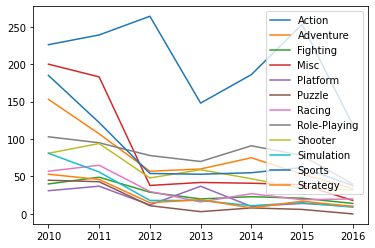

In [ ]:
x = range(2010, 2017)
list = []

for i in range(1, 13):
  plt.plot(x, df_genr[df_genr.columns[i]])
  list.append(df_genr.columns[i])
  
plt.legend(list, loc = 1)
ax = plt.subplot()
ax.set_xticks(x)
  
plt.show(); #전체 플랫폼

전체 장르에서 액션이 가장 많은 부분을 차지하며 상승 곡선임을 알 수 있다. 또한 잡다한 장르에 해당하는 Misc항목이 2010년에는 두 번째로 많았으나 2012년에 크게 떨어짐을 확인할 수 있다. 특정 장르에 대한 선호가 증가함을 확인.

In [ ]:
g_sum = pd.DataFrame(df_genr.drop(['year'], axis = 1).sum()) #pie차트로 장르의 비율을 확인하기 위해 year를 제거하고 장르의 전체 합을 구함.

In [ ]:
g_sum.index

In [ ]:
g_sum #장르가 인덱스임을 확인

In [ ]:
g_sum.reset_index(inplace = True) #장르를 컬럼으로 옮김

In [ ]:
g_sum.columns = ['Genre', 'Sum'] #특정 장르의 합을 'Sum'으로 바꿈.

In [ ]:
g_sum = g_sum.sort_values(by = 'Sum', ascending = False) #파이차트 보기 편하게 오름차순

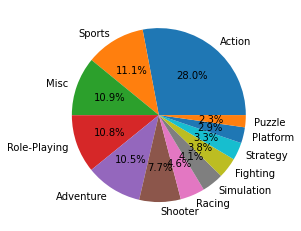

In [ ]:
plt.pie(g_sum['Sum'], labels = g_sum['Genre'], autopct = '%1.1f%%');

상위 다섯 장르는 액션, 스포츠, 롤플레잉, 어드벤쳐, 슈팅게임입니다. 기타에 해당하는 Misc는 제외합니다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


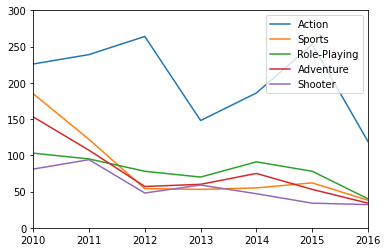

In [ ]:
x = range(2010, 2017)

plt.plot(x, df_genr.Action)
plt.plot(x, df_genr.Sports)
plt.plot(x, df_genr['Role-Playing'])
plt.plot(x, df_genr.Adventure)
plt.plot(x, df_genr.Shooter)

plt.legend(['Action', 'Sports', 'Role-Playing', 'Adventure', 'Shooter'], loc = 1)

ax = plt.subplot()
ax.set_xticks(x)

plt.axis([2010, 2016, 0, 300])
plt.show(); #상위 다섯 개 장르

롤플레잉의 경우에는 하락없이 일정하며 나머지는 2012년까지 하락한 이후 일정하게 유지되오고 있습니다. 

In [ ]:
df_plat = pd.DataFrame(year_plat_trend.groupby('year')['Platform'].value_counts()) #플랫폼 역시 장르와 마찬가지의 과정을 거쳐 정리.

In [ ]:
df_plat = df_plat.unstack()
df_plat = df_plat.droplevel(axis=1,level=0)
df_plat.reset_index(inplace = True)
df_plat = df_plat.fillna(0)

In [ ]:
df_plat.columns

Index(['year', '2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN',
       'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4',
       'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'],
      dtype='object', name='Platform')

In [ ]:
df_plat

In [ ]:
df_plat.year = df_plat.year.astype(int)

In [ ]:
df_plat_2010y = df_plat.query('@df_plat.year >= 2010')

In [ ]:
df_plat_2010y = df_plat_2010y.drop(columns = ['2600', '3DO', "GB", "GBA", 'GC', "GEN", 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB', 'GG', "DC", "N64", 'NES', "NG", 'PCFX', 'PS']) # 단종된 플랫폼 제거
df_plat_2010y.reset_index(drop = True, inplace = True)

In [ ]:
df_plat_2010y

Platform,year,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2010,0.0,326.0,89.0,36.0,181.0,0.0,188.0,0.0,253.0,0.0,182.0,0.0
1,2011,116.0,152.0,140.0,7.0,216.0,0.0,139.0,18.0,143.0,0.0,205.0,0.0
2,2012,93.0,25.0,61.0,0.0,147.0,0.0,105.0,53.0,32.0,32.0,106.0,0.0
3,2013,90.0,9.0,38.0,0.0,127.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0
4,2014,79.0,1.0,44.0,0.0,108.0,75.0,10.0,102.0,6.0,31.0,65.0,61.0
5,2015,86.0,0.0,50.0,0.0,73.0,136.0,3.0,113.0,4.0,28.0,40.0,78.0
6,2016,35.0,0.0,38.0,0.0,32.0,107.0,0.0,60.0,0.0,10.0,8.0,54.0
7,2017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
8,2020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_plat_2010y = df_plat_2010y.drop(index = [7, 8]) #데이터가 없는 2017, 2020년도 제거
df_plat_2010y = df_plat_2010y.drop(['PS2', 'PS3'], axis = 1) #ps2, ps3의 경우 ps4 전 기종이므로 제거

In [ ]:
df_plat_2010y

Platform,year,3DS,DS,PC,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2010,0.0,326.0,89.0,0.0,188.0,0.0,253.0,0.0,182.0,0.0
1,2011,116.0,152.0,140.0,0.0,139.0,18.0,143.0,0.0,205.0,0.0
2,2012,93.0,25.0,61.0,0.0,105.0,53.0,32.0,32.0,106.0,0.0
3,2013,90.0,9.0,38.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0
4,2014,79.0,1.0,44.0,75.0,10.0,102.0,6.0,31.0,65.0,61.0
5,2015,86.0,0.0,50.0,136.0,3.0,113.0,4.0,28.0,40.0,78.0
6,2016,35.0,0.0,38.0,107.0,0.0,60.0,0.0,10.0,8.0,54.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


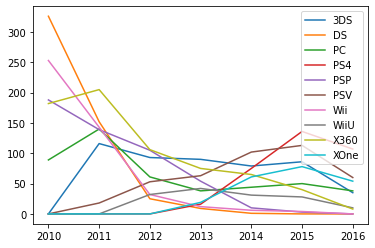

In [ ]:
x = range(2010, 2017)
list = []

for i in range(1, 11):
  plt.plot(x, df_plat_2010y[df_plat_2010y.columns[i]])
  list.append(df_plat_2010y.columns[i])
  
plt.legend(list, loc = 1)
ax = plt.subplot()
ax.set_xticks(x)
  
plt.show(); #전체 플랫폼

위의 꺾은 선 그래프를 보면 PS4가 2012년을 기점으로 급속히 성장했음을 알 수 있습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


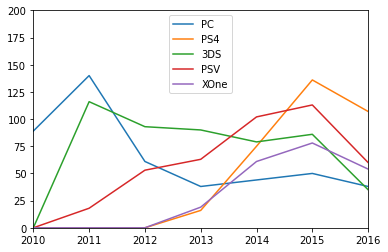

In [ ]:
x = range(2010, 2017)
list = []

plt.plot(x, df_plat_2010y.PC)
plt.plot(x, df_plat_2010y.PS4)
plt.plot(x, df_plat_2010y['3DS'])
plt.plot(x, df_plat_2010y.PSV)
plt.plot(x, df_plat_2010y.XOne)


plt.legend(['PC', 'PS4', '3DS', 'PSV', 'XOne'])

ax = plt.subplot()
ax.set_xticks(x)

plt.axis([2010, 2016, 0, 200])
plt.show(); #PC 보다 큰 플랫폼

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


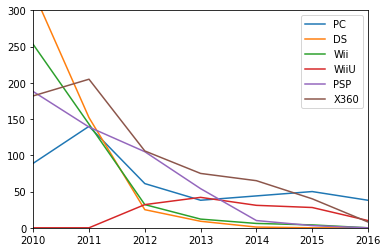

In [ ]:
x = range(2010, 2017)

plt.plot(x, df_plat_2010y.PC)
plt.plot(x, df_plat_2010y.DS)
plt.plot(x, df_plat_2010y.Wii)
plt.plot(x, df_plat_2010y.WiiU)
plt.plot(x, df_plat_2010y.PSP)
plt.plot(x, df_plat_2010y.X360)
plt.legend(['PC', 'DS', 'Wii', 'WiiU', 'PSP', 'X360'])

ax = plt.subplot()
ax.set_xticks(x)

plt.axis([2010, 2016, 0, 300])
plt.show(); #PC 보다 작은 플랫폼

PC 플랫폼은 2010년 이후 하향세였다가 2012년 이후 일정하게 됨.
PS4를 제외한 플랫폼은 2010년 이후 단종되어 하향세였다가 0이 되는 추세. 참고로 PSV현재 단종된 품종임.

=============아래는 판매량에 따른 정리============================

In [ ]:
df_corr_year_not_pub.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,year
0,Candace Kane's Candy Factory,DS,Action,Destineer,0.04,0,0,0,2008
1,The Munchables,Wii,Action,Namco Bandai Games,0.17,0,0,0.01,2009
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0,0,0.02,0,2010
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04,0,0,0,2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,0.12,0.09,0,0.04,2010


In [ ]:
df_corr_year_not_pub.year = df_corr_year_not_pub.year.astype(int)

In [ ]:
df_drop2 = df_corr_year_not_pub.query('@df_corr_year_not_pub.year >= 2010')

In [ ]:
df_drop2.NA_Sales.unique() #단위 K와 M혼합 확인. 단위없는 수치의 단위는 M으로 추정

In [ ]:
def hasnt_KM(inputString): # K, M 제외한 수 찾는 함수 정의
  return bool(re.search('[0-9]$', inputString))

num_NA = df_drop2.NA_Sales.apply(hasnt_KM)
num_NA = df_drop2[num_NA]
num_NA = num_NA.NA_Sales.astype(float)

num_EU = df_drop2.EU_Sales.apply(hasnt_KM)
num_EU = df_drop2[num_EU]
num_EU = num_EU.EU_Sales.astype(float)

num_JP = df_drop2.JP_Sales.apply(hasnt_KM)
num_JP = df_drop2[num_JP]
num_JP = num_JP.JP_Sales.astype(float)

num_ot = df_drop2.Other_Sales.apply(hasnt_KM)
num_ot = df_drop2[num_ot]
num_ot = num_ot.Other_Sales.astype(float)

In [ ]:
num_NA.sort_values(ascending = False).head(10) 

In [ ]:
num_EU.sort_values(ascending = False).head(10)

In [ ]:
num_JP.sort_values(ascending = False).head(10)

In [ ]:
num_ot.sort_values(ascending = False).head(10)

가장 높은 수치인 14.97(4244	Kinect Adventures!)를 이상치로 보며 10미만인 값의 단위는 M으로 추정

In [ ]:
def has_K(inputString): # K찾는 함수 정의
  return bool(re.search('[K]', inputString))

end_K = df_drop2.EU_Sales.apply(has_K)
K_end = df_drop2[end_K]
K_end.EU_Sales

In [ ]:
def has_M(inputString): # M찾는 함수 정의
  return bool(re.search('[M]', inputString))

end_M = df_drop2.EU_Sales.apply(has_M)
M_end = df_drop2[end_M]
M_end.EU_Sales

In [ ]:
for i in df_drop2.index: # NA 열의 K, M 제거 및 수 정리
  if has_K(df_drop2.NA_Sales[i]):
    df_drop2.NA_Sales[i] = df_drop2.NA_Sales[i].replace('K', '000')

for i in df_drop2.index:
  if has_M(df_drop2.NA_Sales[i]):
    df_drop2.NA_Sales[i] = df_drop2.NA_Sales[i].replace('M', '')

df_drop2.NA_Sales = df_drop2.NA_Sales.astype(float)

for i in df_drop2.index:
  if df_drop2.NA_Sales[i] < 10:
    df_drop2.NA_Sales[i] = df_drop2.NA_Sales[i] *(10**6)

In [ ]:
for i in df_drop2.index: # NA 열의 K, M 제거 및 수 정리
  if has_K(df_drop2.EU_Sales[i]):
    df_drop2.EU_Sales[i] = df_drop2.EU_Sales[i].replace('K', '000')

for i in df_drop2.index:
  if has_M(df_drop2.EU_Sales[i]):
    df_drop2.EU_Sales[i] = df_drop2.EU_Sales[i].replace('M', '')

df_drop2.EU_Sales = df_drop2.EU_Sales.astype(float)

for i in df_drop2.index:
  if df_drop2.EU_Sales[i] < 10:
    df_drop2.EU_Sales[i] = df_drop2.EU_Sales[i] *(10**6)

In [ ]:
for i in df_drop2.index:
  if has_K(df_drop2.JP_Sales[i]):
    df_drop2.JP_Sales[i] = df_drop2.JP_Sales[i].replace('K', '000')

for i in df_drop2.index:
  if has_M(df_drop2.JP_Sales[i]):
    df_drop2.JP_Sales[i] = df_drop2.JP_Sales[i].replace('M', '')

df_drop2.JP_Sales = df_drop2.JP_Sales.astype(float)

for i in df_drop2.index:
  if df_drop2.JP_Sales[i] < 10:
    df_drop2.JP_Sales[i] = df_drop2.JP_Sales[i] *(10**6)

In [ ]:
for i in df_drop2.index:
  if has_K(df_drop2.Other_Sales[i]):
    df_drop2.Other_Sales[i] = df_drop2.Other_Sales[i].replace('K', '000')

for i in df_drop2.index:
  if has_M(df_drop2.Other_Sales[i]):
    df_drop2.Other_Sales[i] = df_drop2.Other_Sales[i].replace('M', '')

df_drop2.Other_Sales = df_drop2.Other_Sales.astype(float)

for i in df_drop2.index:
  if df_drop2.Other_Sales[i] < 10:
    df_drop2.Other_Sales[i] = df_drop2.Other_Sales[i] *(10**6)

In [ ]:
df_drop2.drop(index = 4244, inplace = True) #이상치 제거

In [ ]:
df_drop2.isna().sum()

Name            0
Platform        0
Genre           0
Publisher      11
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
year            0
dtype: int64

In [ ]:
df_sale_anal = df_drop2

========================판매량에 따른 분석=============================

In [ ]:
df_sale_anal.head() #2010년도 판매량 분석

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,year
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.0,0.0,20000.0,0.0,2010
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,40000.0,0.0,0.0,0.0,2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,2010
6,JASF: Jane's Advanced Strike Fighters,PC,Simulation,Deep Silver,20000.0,10000.0,0.0,0.0,2011
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,Action,THQ,40000.0,30000.0,0.0,10000.0,2011


In [ ]:
df_sale_anal.to_csv('판매분석3.csv', index = False)

In [2]:
df_sale_anal = pd.read_csv('판매분석3.csv')

In [ ]:
genr_country = df_sale_anal.drop(columns = ['Platform', 'Publisher', 'year']) # 2010년도 각 지역 장르 별 판매량 
genr_country.head()

In [ ]:
gen_c = genr_country.groupby('Genre', as_index = False)['NA_Sales', "EU_Sales", 'JP_Sales', 'Other_Sales'].sum()

In [ ]:
gen_c

In [ ]:
gen_NA = gen_c[['Genre', 'NA_Sales']]
gen_EU = gen_c[['Genre', 'EU_Sales']]
gen_JP = gen_c[['Genre', 'JP_Sales']]

Text(0, 0.5, 'NA Total Sales (X10^8)')

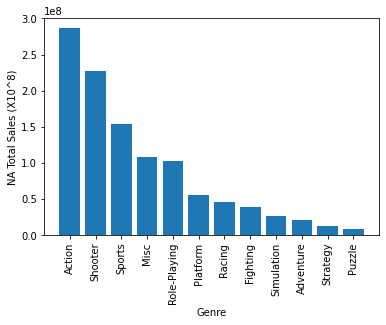

In [ ]:
gen_NA = gen_NA.sort_values(by = 'NA_Sales', ascending = False)
plt.bar(gen_NA.Genre, gen_NA.NA_Sales)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('NA Total Sales (X10^8)')

Text(0, 0.5, 'EU Total Sales (X10^8)')

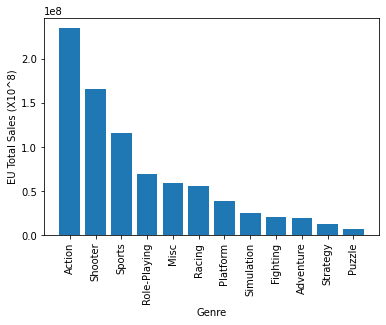

In [ ]:
gen_EU = gen_EU.sort_values(by = 'EU_Sales', ascending = False)
plt.bar(gen_EU.Genre, gen_EU.EU_Sales)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('EU Total Sales (X10^8)')

Text(0, 0.5, 'JP Total Sales (X10^8)')

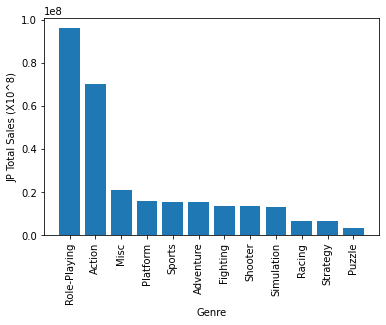

In [ ]:
gen_JP = gen_JP.sort_values(by = 'JP_Sales', ascending = False)
plt.bar(gen_JP.Genre, gen_JP.JP_Sales)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('JP Total Sales (X10^8)')

결론: 북미지역과 유럽은 액션, 슈팅게임, 스포츠 게임의 선호도가 높음. 일본의 경우 롤플레잉 게임의 선호도가 가장 높으며 액션게임의 선호도가 그 다음으로 큼.

In [3]:
df_sale_anal['Total_Sales'] = df_sale_anal.NA_Sales	+ df_sale_anal.EU_Sales	+ df_sale_anal.JP_Sales	+ df_sale_anal.Other_Sales
df_sale_anal.drop(['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], axis = 1, inplace = True)
df_sale_anal.head() #2010년대 출고량이 높은 게임에 대한 분석용

,Name,Platform,Genre,Publisher,year,Total_Sales
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,2010,20000.0
1,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,2010,40000.0
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,2010,250000.0
3,JASF: Jane's Advanced Strike Fighters,PC,Simulation,Deep Silver,2011,30000.0
4,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,Action,THQ,2011,80000.0


In [4]:
df_sale_anal.Total_Sales = df_sale_anal.Total_Sales.astype(int)

In [5]:
df_sale_anal.year = df_sale_anal.year.astype(int)

In [8]:
df_sale_plat = df_sale_anal[['Platform', 'Total_Sales']]

In [39]:
plat_no_pc = df_sale_plat[df_sale_plat.Platform != 'PC']

In [20]:
np.random.seed(10)

not_pc_means, pc_means = [], []

for i in range(10000):
  sample = df_sale_plat.sample(df_sale_plat.shape[0], replace=True)

  not_pc_mean = sample[sample.Platform != 'PC'].Total_Sales.mean()
  not_pc_means.append(not_pc_mean)
    
  plat_pc_mean = sample[sample.Platform == 'PC'].Total_Sales.mean()
  pc_means.append(plat_pc_mean)


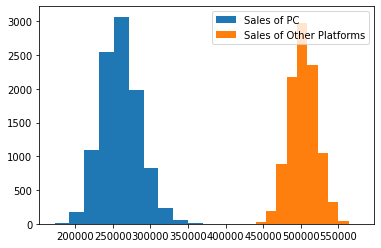

In [38]:
plt.hist(pc_means, label = 'Sales of PC')
plt.hist(not_pc_means, label = 'Sales of Other Platforms')
plt.legend(loc = 1)

In [ ]:
df_sale_total = df_sale_anal.sort_values(by = 'Total_Sales', ascending = False)

In [ ]:
df_sale_total.head(20)

,Name,Platform,Genre,Publisher,year,Total_Sales
1049,Grand Theft Auto V,PS3,Action,Take-Two Interactive,2013,21390000
3358,Grand Theft Auto V,X360,Action,Take-Two Interactive,2013,16380000
3267,Pokemon Black/Pokemon White,DS,Role-Playing,Nintendo,2010,15320000
841,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,2011,14760000
1899,Call of Duty: Black Ops,X360,Shooter,Activision,2010,14640000
2791,Call of Duty: Black Ops 3,PS4,Shooter,Activision,2015,14240000
1271,Call of Duty: Black Ops II,PS3,Shooter,Activision,2012,14040000
1949,Call of Duty: Black Ops II,X360,Shooter,Activision,2012,13740000
4360,Call of Duty: Modern Warfare 3,PS3,Shooter,Activision,2011,13470000
3060,Call of Duty: Black Ops,PS3,Shooter,Activision,2010,12730000


In [ ]:
df_sale_PC = df_sale_total.query('@df_sale_total.Platform == "PC"').reset_index(drop = True)
df_sale_PC.head(10) #최근 2010년도 PC 상위 10항목

,Name,Platform,Genre,Publisher,year,Total_Sales
0,Diablo III,PC,Role-Playing,Activision,2012,5200000
1,StarCraft II: Wings of Liberty,PC,Strategy,Activision,2010,4830000
2,The Elder Scrolls V: Skyrim,PC,Role-Playing,Bethesda Softworks,2011,3880000
3,The Sims 4,PC,Simulation,Electronic Arts,2014,2970000
4,Star Wars: The Old Republic,PC,Role-Playing,Electronic Arts,2011,2970000
5,Battlefield 3,PC,Shooter,Electronic Arts,2011,2800000
6,Guild Wars 2,PC,Action,NCSoft,2012,2300000
7,World of Warcraft: Cataclysm,PC,Role-Playing,Activision,2010,2090000
8,World of Warcraft: Mists of Pandaria,PC,Role-Playing,Activision,2012,1830000
9,Call of Duty: Modern Warfare 3,PC,Shooter,Activision,2011,1720000


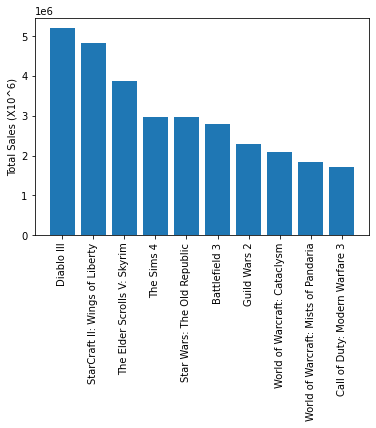

In [ ]:
index = np.arange(10)
pc_sale_10 = df_sale_PC.head(10)

plt.bar(pc_sale_10.Name, pc_sale_10.Total_Sales)
plt.xticks(index, pc_sale_10.Name, rotation=90)
plt.ylabel('Total Sales (X10^6)')
plt.show(); #PC Publisher top 10 막대 그래프

In [ ]:
ascending = df_sale_PC.groupby('Publisher', as_index = False)['Total_Sales'].sum().sort_values(by = 'Total_Sales', ascending = False)

In [ ]:
top_ten = ascending.reset_index(drop = True).iloc[:10]
top_ten #2010년도 pc Publisher 탑 10

,Publisher,Total_Sales
0,Electronic Arts,29580000
1,Activision,21790000
2,Ubisoft,12310000
3,Bethesda Softworks,9310000
4,Take-Two Interactive,8840000
5,Sega,8710000
6,Square Enix,3640000
7,Focus Home Interactive,3140000
8,Warner Bros. Interactive Entertainment,2660000
9,NCSoft,2470000


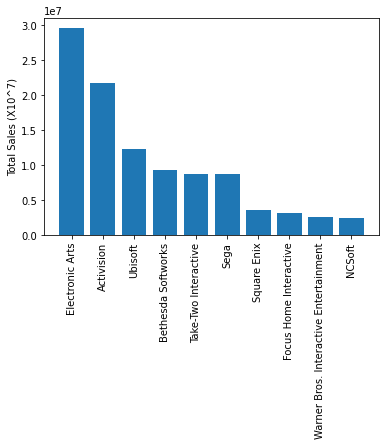

In [ ]:
index = np.arange(10)

plt.bar(top_ten.Publisher, top_ten.Total_Sales)
plt.xticks(index, top_ten.Publisher, rotation=90)
plt.ylabel('Total Sales (X10^7)')
plt.show(); #PC Publisher top 10 막대 그래프

In [ ]:
list = []
for i in range(6):
  list.append(top_ten.Publisher[i])
list #Top 6만 살펴보겠음 (차이가 커서)

['Electronic Arts',
 'Activision',
 'Ubisoft',
 'Bethesda Softworks',
 'Take-Two Interactive',
 'Sega']

In [ ]:
f_df = df_sale_PC[df_sale_PC.Publisher == list[0]]
f_df.head()

,Name,Platform,Genre,Publisher,year,Total_Sales
3,The Sims 4,PC,Simulation,Electronic Arts,2014,2970000
4,Star Wars: The Old Republic,PC,Role-Playing,Electronic Arts,2011,2970000
5,Battlefield 3,PC,Shooter,Electronic Arts,2011,2800000
10,The Sims 3: Late Night Expansion Pack,PC,Simulation,Electronic Arts,2010,1710000
17,SimCity (2013),PC,Simulation,Electronic Arts,2013,1440000


In [ ]:
for i in range(1, 6):
  f_df = f_df.append(df_sale_PC[df_sale_PC.Publisher == list[i]])

f_df.head()


,Name,Platform,Genre,Publisher,year,Total_Sales
3,The Sims 4,PC,Simulation,Electronic Arts,2014,2970000
4,Star Wars: The Old Republic,PC,Role-Playing,Electronic Arts,2011,2970000
5,Battlefield 3,PC,Shooter,Electronic Arts,2011,2800000
10,The Sims 3: Late Night Expansion Pack,PC,Simulation,Electronic Arts,2010,1710000
17,SimCity (2013),PC,Simulation,Electronic Arts,2013,1440000


In [ ]:
f_df

In [ ]:
top6_2010y_pc = f_df

In [ ]:
top6_2010y_pc = top6_2010y_pc.sort_values(by = 'Total_Sales', ascending = False).reset_index(drop = True) # platform = pc, top 6의 자료

In [ ]:
top6_2010y_pc

In [ ]:
pd.DataFrame(top6_2010y_pc.groupby('Publisher')['Genre'].value_counts())

In [ ]:
ea_sales = top6_2010y_pc[top6_2010y_pc.Publisher == 'Electronic Arts'].groupby('Genre')['Total_Sales'].sum().sort_values(ascending = False)
ea_genre = top6_2010y_pc[top6_2010y_pc.Publisher == 'Electronic Arts'].Genre.value_counts()
ea_ratio = pd.DataFrame((ea_sales/ea_genre).sort_values(ascending = False)).reset_index()
ea_ratio.columns = ['Genre', 'Ratio']

In [ ]:
pd.DataFrame(ea_ratio.Ratio.astype(int))

,Ratio
0,656666
1,644444
2,630000
3,337777
4,235714
5,190000
6,120000
7,50000
8,10000


In [ ]:
actvi_sales = ub_sales = top6_2010y_pc[top6_2010y_pc.Publisher == 'Activision'].groupby('Genre')['Total_Sales'].sum().sort_index()
actvi_genre = top6_2010y_pc[top6_2010y_pc.Publisher == 'Activision'].Genre.value_counts().sort_index()
actvi_ratio = pd.DataFrame((actvi_sales/actvi_genre).sort_values(ascending = False)).reset_index()
actvi_ratio.columns = ['Genre', 'Ratio']

In [ ]:
ub_ratio

,Genre,Ratio
0,Misc,660000.000000
1,Strategy,476000.000000
2,Shooter,411666.666667
3,Action,336250.000000
4,Role-Playing,176666.666667
5,Simulation,155000.000000
6,Racing,95000.000000
7,Platform,70000.000000
8,Adventure,40000.000000
9,Sports,25000.000000


In [ ]:
pd.DataFrame(BS_ratio.Ratio.astype(int))

,Ratio
0,1792500
1,244000
2,184000


In [ ]:
ub_sales = top6_2010y_pc[top6_2010y_pc.Publisher == 'Ubisoft'].groupby('Genre')['Total_Sales'].sum().sort_index()
ub_genre = top6_2010y_pc[top6_2010y_pc.Publisher == 'Ubisoft'].Genre.value_counts().sort_index()
ub_ratio = (ub_sales/ub_genre).sort_values(ascending = False).reset_index()
ub_ratio.columns = ['Genre', 'Ratio']

In [ ]:
BS_sales = top6_2010y_pc[top6_2010y_pc.Publisher == 'Bethesda Softworks'].groupby('Genre')['Total_Sales'].sum().sort_index()
BS_genre = top6_2010y_pc[top6_2010y_pc.Publisher == 'Bethesda Softworks'].Genre.value_counts().sort_index()
BS_ratio = (BS_sales/BS_genre).sort_values(ascending = False).reset_index()
BS_ratio.columns = ['Genre', 'Ratio']

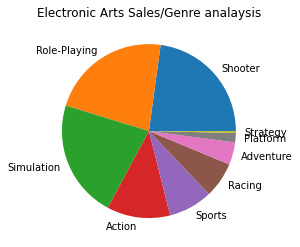

In [ ]:
plt.pie(ea_ratio['Ratio'], labels = ea_ratio['Genre']);
plt.title('Electronic Arts Sales/Genre analaysis');

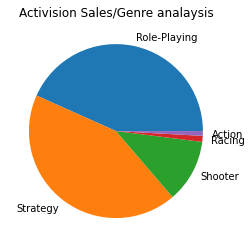

In [ ]:
plt.pie(actvi_ratio['Ratio'], labels = actvi_ratio['Genre']);
plt.title('Activision Sales/Genre analaysis');

Text(0.5, 1.0, 'Ubisoft Sales/Genre analaysis')

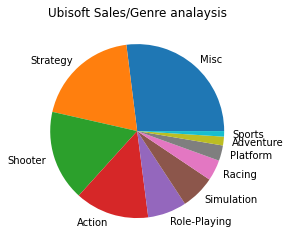

In [ ]:
plt.pie(ub_ratio['Ratio'], labels = ub_ratio['Genre']);
plt.title('Ubisoft Sales/Genre analaysis')

Text(0.5, 1.0, 'Bethesda Softworks Sales/Genre analysis')

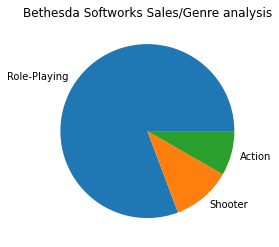

In [ ]:
plt.pie(BS_ratio['Ratio'], labels = BS_ratio['Genre']);
plt.title('Bethesda Softworks Sales/Genre analysis')